In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_NW_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,0.0,0.99539,-0.05889,NaN,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,NaN,0.21266,-0.34090,0.42267,NaN,0.18641,-0.45300
1,1.0,NaN,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,NaN,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1.0,0.0,1.00000,-0.03365,1.00000,0.00485,1.00000,NaN,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1.0,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,NaN,0.00000,0.00000,...,NaN,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1.0,0.0,1.00000,-0.02401,0.94140,0.06531,0.92106,NaN,0.77152,NaN,...,0.03286,NaN,0.13290,-0.53206,0.02431,NaN,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,0.0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1.0,0.0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1.0,0.0,0.94701,NaN,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1.0,0.0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,NaN,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	17
float64		column 2	35
float64		column 3	0
float64		column 4	52
float64		column 5	69
float64		column 6	17
float64		column 7	17
float64		column 8	35
float64		column 9	34
float64		column 10	52
float64		column 11	17
float64		column 12	51
float64		column 13	35
float64		column 14	34
float64		column 15	17
float64		column 16	52
float64		column 17	69
float64		column 18	17
float64		column 19	34
float64		column 20	69
float64		column 21	18
float64		column 22	35
float64		column 23	35
float64		column 24	52
float64		column 25	35
float64		column 26	34
float64		column 27	34
float64		column 28	17
float64		column 29	17
float64		column 30	34
float64		column 31	52
float64		column 32	52
float64		column 33	17
float64		column 34	18


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,334.000000,316.0,351.000000,299.000000,282.000000,334.000000,334.000000,316.000000,317.000000,299.000000,...,316.000000,317.000000,317.000000,334.000000,334.000000,317.000000,299.000000,299.000000,334.000000,333.000000
mean,0.895210,0.0,0.641342,0.035981,0.609234,0.122520,0.552009,0.111571,0.511517,0.160010,...,0.404198,-0.062535,0.562814,-0.074165,0.385422,-0.045449,0.361740,0.011219,0.352663,0.003932
std,0.306743,0.0,0.497708,0.429052,0.498700,0.449838,0.493642,0.505959,0.501447,0.454291,...,0.561249,0.496783,0.482718,0.535306,0.565179,0.475403,0.548064,0.476501,0.513439,0.460409
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.058370,0.445032,-0.023920,0.236365,-0.044163,0.109910,-0.045855,...,0.000000,-0.289030,0.334010,-0.410092,0.000000,-0.223700,0.000000,-0.208215,0.000000,-0.156760
50%,1.000000,0.0,0.871110,0.014030,0.790760,0.022930,0.728000,0.015595,0.666670,0.016060,...,0.540980,-0.012690,0.698110,-0.019710,0.496010,0.000000,0.442770,0.000000,0.408885,0.000000
75%,1.000000,0.0,1.000000,0.155945,0.995920,0.335317,0.966560,0.364705,0.948170,0.388890,...,0.895000,0.159080,1.000000,0.145928,0.881235,0.098470,0.823330,0.182150,0.806693,0.151140
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

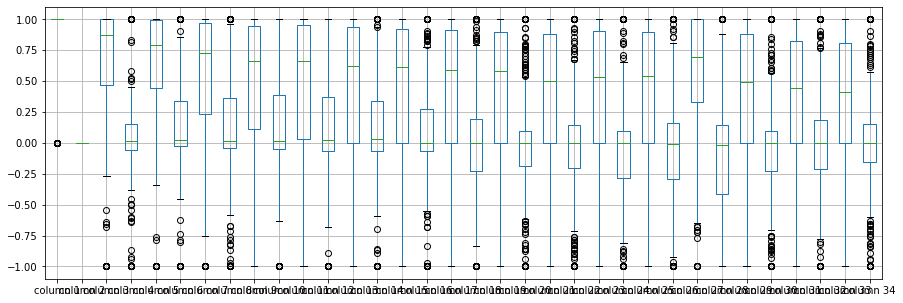

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.895210
column 2     0.000000
column 3     0.641342
column 4     0.035981
column 5     0.609234
column 6     0.122520
column 7     0.552009
column 8     0.111571
column 9     0.511517
column 10    0.160010
column 11    0.475811
column 12    0.130984
column 13    0.398547
column 14    0.093959
column 15    0.359475
column 16    0.066915
column 17    0.410628
column 18   -0.012230
column 19    0.394105
column 20   -0.018870
column 21    0.345370
column 22    0.000122
column 23    0.366898
column 24   -0.063906
column 25    0.404198
column 26   -0.062535
column 27    0.562814
column 28   -0.074165
column 29    0.385422
column 30   -0.045449
column 31    0.361740
column 32    0.011219
column 33    0.352663
column 34    0.003932
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.311632,0.056905,0.205127,0.096529,0.225511,0.060340,0.169760,0.028426,...,0.026301,0.137213,-0.260197,0.037883,0.156647,-0.136301,0.129727,-0.080869,0.118826,0.069432
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.311632,NaN,1.000000,0.168767,0.493003,0.047464,0.432064,0.003793,0.463713,0.051108,...,0.260090,-0.083578,0.009702,0.140295,0.332090,-0.008687,0.215829,-0.017869,0.251205,0.000592
column 4,0.056905,NaN,0.168767,1.000000,-0.042317,-0.228617,0.009770,0.156469,-0.260930,0.124752,...,-0.146257,-0.234016,-0.145899,-0.121922,-0.036957,0.355462,-0.162137,-0.209269,-0.200918,0.083309
column 5,0.205127,NaN,0.493003,-0.042317,1.000000,0.108962,0.614731,0.012706,0.486320,-0.073650,...,0.292809,-0.011247,0.114698,0.124668,0.251069,-0.010809,0.390147,0.065708,0.393559,-0.028526
column 6,0.096529,NaN,0.047464,-0.228617,0.108962,1.000000,-0.036800,0.299815,-0.092878,0.171448,...,-0.165061,-0.010585,-0.165787,-0.014994,-0.027071,-0.134957,-0.113473,0.246612,0.034572,0.159085
column 7,0.225511,NaN,0.432064,0.009770,0.614731,-0.036800,1.000000,-0.142842,0.411721,-0.057898,...,0.232278,0.071593,0.035714,0.141689,0.248323,-0.031181,0.423216,-0.001028,0.515354,-0.094552
column 8,0.060340,NaN,0.003793,0.156469,0.012706,0.299815,-0.142842,1.000000,-0.341155,0.356149,...,-0.199141,-0.073496,-0.224211,0.139477,-0.152933,0.020758,-0.253619,0.168886,-0.179535,0.399073
column 9,0.169760,NaN,0.463713,-0.260930,0.486320,-0.092878,0.411721,-0.341155,1.000000,-0.164194,...,0.348382,0.043833,0.163420,0.145214,0.329085,0.002924,0.288963,-0.039093,0.327530,-0.095325
column 10,0.028426,NaN,0.051108,0.124752,-0.073650,0.171448,-0.057898,0.356149,-0.164194,1.000000,...,-0.382818,-0.011736,-0.252624,0.070128,-0.155505,-0.080685,-0.261619,0.027002,-0.221657,0.126643


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [ ]:
imputer = md.Midas(layer_structure = [34,34+54,34+54+54,34+54+54+54,34+54+54+54+54,34+54+54+54,34+54+54,34+54,34], vae_layer = False, seed = 540)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 17.908946582249232
Epoch: 1 , loss: 17.98642076764788
Epoch: 2 , loss: 17.89400863647461
Epoch: 3 , loss: 17.766074362255278
Epoch: 4 , loss: 17.860132898603165
Epoch: 5 , loss: 17.84304968516032
Epoch: 6 , loss: 17.70379706791469
Epoch: 7 , loss: 17.640373865763348
Epoch: 8 , loss: 17.352271307082404
Epoch: 9 , loss: 17.0650577545166
Epoch: 10 , loss: 16.443632307506743
Epoch: 11 , loss: 16.037264324369886
Epoch: 12 , loss: 15.87814980461484
Epoch: 13 , loss: 15.683554649353027
Epoch: 14 , loss: 15.710642905462356
Epoch: 15 , loss: 15.700654711042132
Epoch: 16 , loss: 15.345825604030065
Epoch: 17 , loss: 15.434749512445359
Epoch: 18 , loss: 15.383418355669294
Epoch: 19 , loss: 15.600222496759324
Epoch: 20 , loss: 15.360131808689662
Epoch: 21 , loss: 15.370874087015787
Epoch: 22 , loss: 15.407513028099423
Epoch: 23 , loss: 15.388404664539156
Epoch: 24 , loss: 15.335542497180757
Epoch: 25 , loss: 15.072

In [ ]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

In [ ]:
new_df=imputations[-1]
new_df.iloc[21,:]


In [ ]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [ ]:
new_df-complete_df

Calculating NRMSE Value

In [ ]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [ ]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [ ]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

In [ ]:
denominator=Frobenius_norm(complete_df)
denominator

In [ ]:
NRMS=numerator/denominator
NRMS


In [ ]:
new_df.iloc[66,:]

In [ ]:
imputations[-1]


In [ ]:
imputations[-1].to_excel("Ionosphere_NW_10(imp).xlsx", index=False, header=False)